In [28]:
%matplotlib inline
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import feyn
from sklearn.model_selection import train_test_split
import xgboost as xg 
from sklearn.svm import SVR 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [29]:
df=pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/research/data/8-feat-eng/feat-lag.csv')

In [30]:
df.head()

,Unnamed: 0,index,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,...,rel_hum_lag_5,wind_speed_lag_5,demand_lag_6,rel_hum_lag_6,wind_speed_lag_6,demand_lag_7,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
0,7,7,-13.225000,-15.316667,84.333333,16.041667,10.654167,99.271667,-20.541667,18435.000000,...,77.250000,17.666667,15783.333333,74.416667,17.875000,14655.208333,87.000000,20.333333,-1115.308333,-212.151042
1,8,8,-17.804167,-22.325000,68.083333,7.666667,31.295833,100.806667,-25.058824,18043.750000,...,74.416667,25.791667,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,-1212.167014,-136.498611
2,9,9,-14.858333,-18.841667,71.916667,10.750000,20.783333,101.655000,-20.904762,19717.916667,...,70.791667,22.875000,19080.708333,74.416667,25.791667,18992.708333,77.250000,17.666667,-1068.561806,-159.727083
3,10,10,-2.879167,-5.737500,80.791667,16.041667,14.887500,100.441250,-9.352941,18584.291667,...,80.875000,22.250000,19183.208333,70.791667,22.875000,19080.708333,74.416667,25.791667,-232.612674,-46.186632
4,11,11,-7.758333,-9.816667,85.291667,9.250000,17.291667,99.892083,-11.894737,18506.250000,...,78.208333,22.708333,20335.791667,80.875000,22.250000,19183.208333,70.791667,22.875000,-661.721181,-71.764583


In [31]:
df = df.dropna()

In [32]:
df.head()

,Unnamed: 0,index,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,...,rel_hum_lag_5,wind_speed_lag_5,demand_lag_6,rel_hum_lag_6,wind_speed_lag_6,demand_lag_7,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
0,7,7,-13.225000,-15.316667,84.333333,16.041667,10.654167,99.271667,-20.541667,18435.000000,...,77.250000,17.666667,15783.333333,74.416667,17.875000,14655.208333,87.000000,20.333333,-1115.308333,-212.151042
1,8,8,-17.804167,-22.325000,68.083333,7.666667,31.295833,100.806667,-25.058824,18043.750000,...,74.416667,25.791667,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,-1212.167014,-136.498611
2,9,9,-14.858333,-18.841667,71.916667,10.750000,20.783333,101.655000,-20.904762,19717.916667,...,70.791667,22.875000,19080.708333,74.416667,25.791667,18992.708333,77.250000,17.666667,-1068.561806,-159.727083
3,10,10,-2.879167,-5.737500,80.791667,16.041667,14.887500,100.441250,-9.352941,18584.291667,...,80.875000,22.250000,19183.208333,70.791667,22.875000,19080.708333,74.416667,25.791667,-232.612674,-46.186632
4,11,11,-7.758333,-9.816667,85.291667,9.250000,17.291667,99.892083,-11.894737,18506.250000,...,78.208333,22.708333,20335.791667,80.875000,22.250000,19183.208333,70.791667,22.875000,-661.721181,-71.764583


In [33]:
df.columns

Index(['Unnamed: 0', 'index', 'temp', 'dew_point_temp', 'rel_hum',
       'wind_speed', 'visibility', 'press', 'wind_chill', 'daily_demand',
       'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median',
       'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean',
       'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean',
       'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean',
       'visibility_median', 'press_min', 'press_max', 'press_mean',
       'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median',
       'week_of_year', 'day_of_week', 'year', 'month', 'day',
       'demand_rolling_mean_3', 'demand_rolling_std_7', 'temp_roll_mean',
       'temp_roll_std', 'rel_hum_roll_mean', 'rel_hum_roll_std',
       'demand_lag_1', 'rel_hum_lag_1', 'wind_speed_lag_1', 'demand_lag_2',
       'rel_hum_lag_2', 'wind_speed_lag_2', 'demand_lag_3', 'rel_hum_lag_3',
       'wind_speed_lag_3', 'demand_lag_4', 'rel_hum_lag_4'

In [34]:
df.drop(columns=['Unnamed: 0', 'index'], inplace = True)

In [35]:
x = df.loc[:, df.columns != 'daily_demand'].values
y = df.loc[:, 'daily_demand'].values

In [120]:
# x_graph = data.iloc[8766:, data.columns != 'hourly_demand'].values
# pred_graph = data.iloc[8766:, 'hourly_demand'].values


rows_to_select = 8766

# Select all columns except 'hourly_demand'
columns_except_hourly_demand = df.columns != 'daily_demand'

# Extract x_graph using iloc and boolean indexing for columns
x_graph = df.iloc[rows_to_select:, columns_except_hourly_demand].values

# Extract pred_graph using iloc and direct indexing for the specific column
pred_graph = df.iloc[rows_to_select:]['daily_demand'].values

In [121]:
print(pred_graph.shape)


(0,)


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [123]:
print(x_graph.shape)
print(x.shape)
print(pred_graph.shape)


(0, 66)
(3044, 66)
(0,)


In [36]:
qtrain, qtest = feyn.tools.split(df, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'daily_demand'].values
qytest

array([17111.5       , 18378.04166667, 17100.70833333, ...,
       20836.08333333, 16784.20833333, 16325.45833333])

In [125]:
# Instantiate a QLattice
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtrain,
    output_name='daily_demand'
)
best = qmodels[0]

In [126]:
best.predict(qtest)

array([17486.70508584, 18782.60606532, 16576.84955922, ...,
       20668.9228815 , 16932.79402719, 16203.2375589 ])

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="384.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 771 384.0" width="771" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="275.0" width="591" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="110.0"><title>daily_demand
linear:
scale=4591.875000
scale offset=0.000000
w=-1.136346
bias=0.2849</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="131.5">daily_de..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="119.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="119.0">out</text><line stroke="#1E1E1E" x1="451" x2="481" y1="127.5" y2="127.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="110.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="131.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="119.0">1</text><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="118.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="157.5" y2="136.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="80.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">2</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="88.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>wind_speed_lag_4
linear:
scale=0.044651
scale offset=17.607496
w=0.001833
bias=-1.7243</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">wind_spe..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="80.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="101.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="89.0">4</text><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="88.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="157.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>dew_point_temp_max
linear:
scale=0.053763
scale offset=-4.248495
w=0.067952
bias=-3.9708</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">dew_poin..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y=
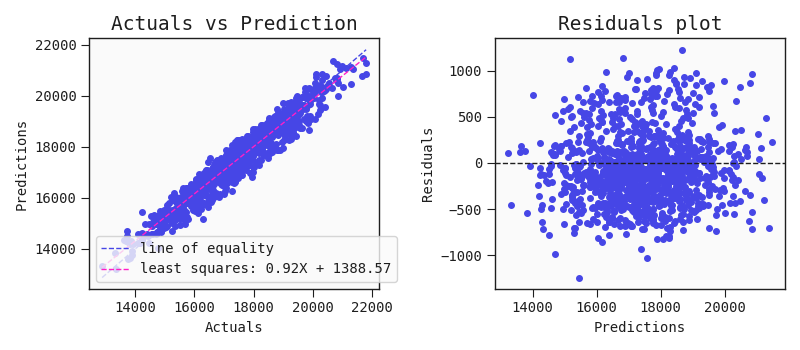

In [127]:
best.plot(qtest)